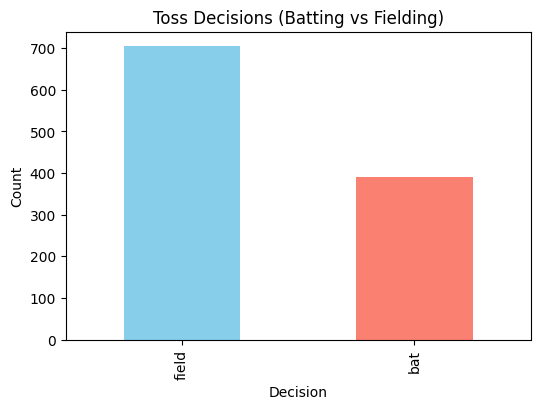

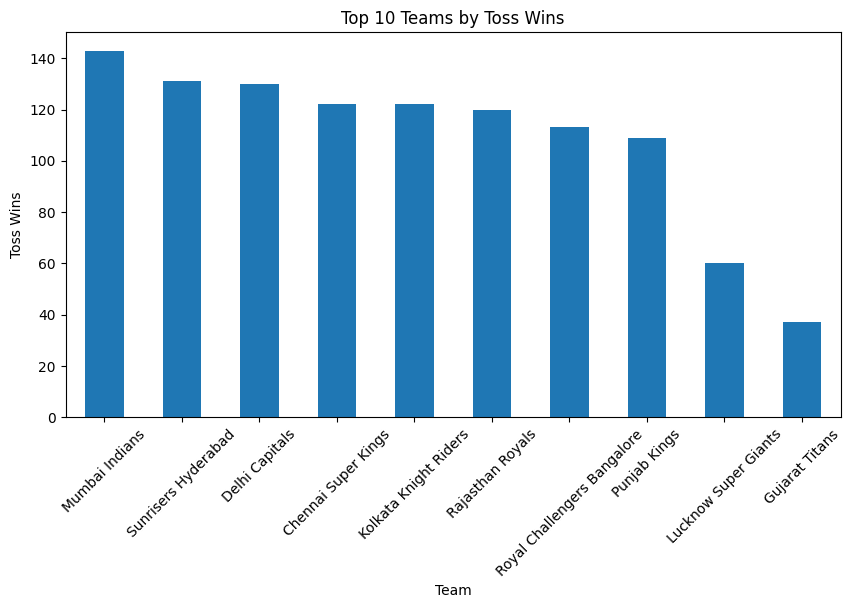

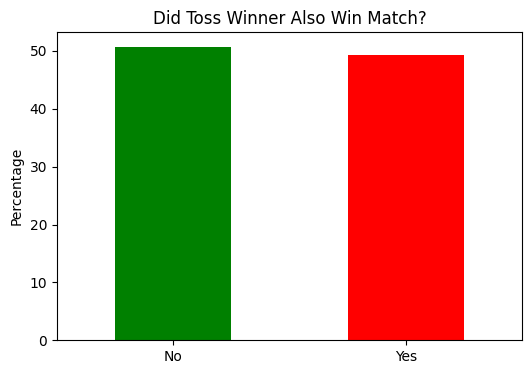

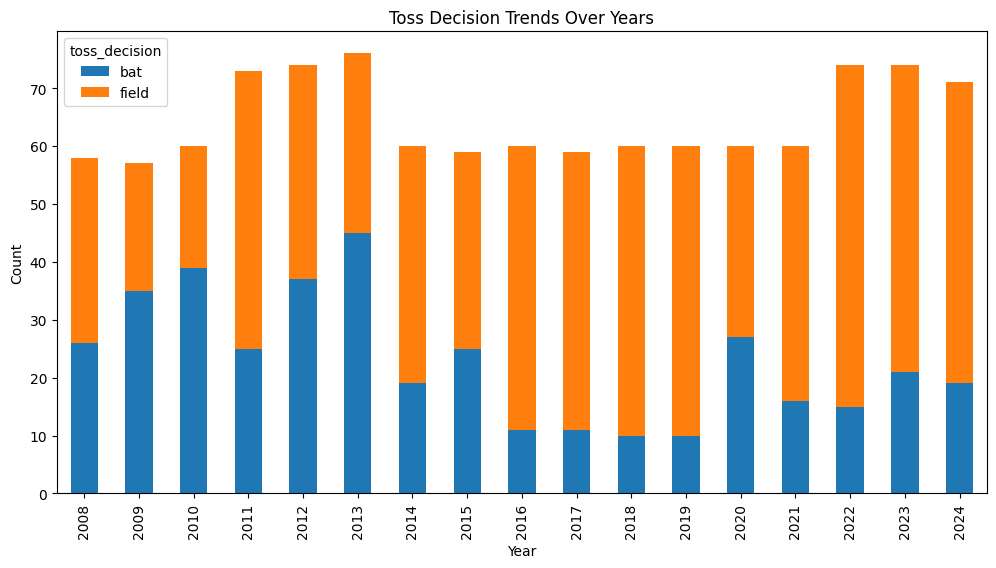

============== TOSS IMPACT RESULTS ==============
Total Matches: 1095
Matches won by Toss Winner: 555
Matches won by Toss Loser: 540

============== DETAILED BREAKDOWN ==============
1. Team won toss AND won match: 555
2. Team lost toss BUT won match: 540
3. Toss winner chose BATTING and won: 178
4. Toss winner chose FIELDING and won: 377


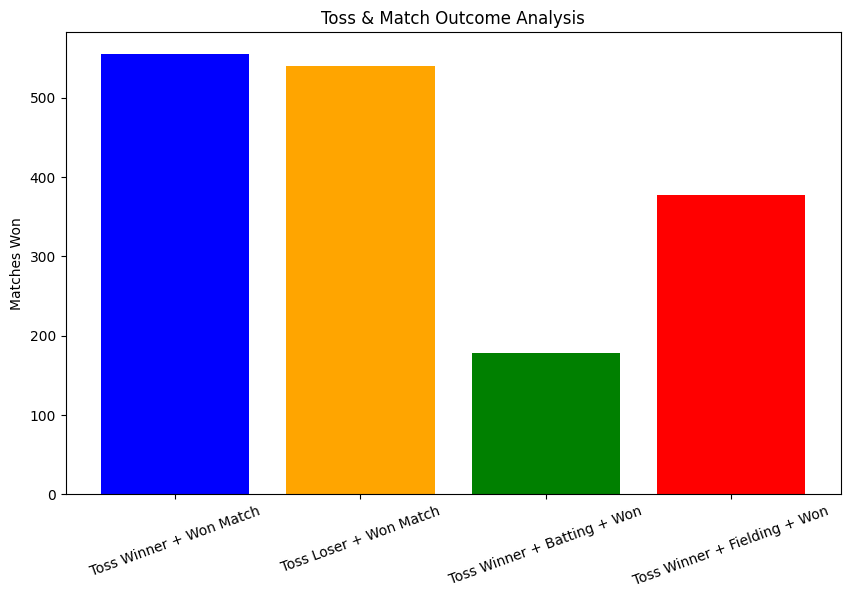

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load matches data
matches = pd.read_csv("cleaned_matches.csv")

# ==============================
# 1. Toss Decision Distribution
# ==============================
toss_decision_counts = matches['toss_decision'].value_counts()
plt.figure(figsize=(6,4))
toss_decision_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Toss Decisions (Batting vs Fielding)")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.show()

# 2. Most Toss Wins by Team
toss_wins_by_team = matches['toss_winner'].value_counts().head(10)
plt.figure(figsize=(10,5))
toss_wins_by_team.plot(kind='bar')
plt.title("Top 10 Teams by Toss Wins")
plt.xlabel("Team")
plt.ylabel("Toss Wins")
plt.xticks(rotation=45)
plt.show()

# 3. Toss Winner vs Match Winner %
toss_match_winner = (matches['toss_winner'] == matches['winner']).value_counts(normalize=True) * 100
plt.figure(figsize=(6,4))
toss_match_winner.plot(kind='bar', color=['green','red'])
plt.title("Did Toss Winner Also Win Match?")
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.ylabel("Percentage")
plt.show()


# 4. Toss Decision Trends Over Years
matches['year'] = pd.to_datetime(matches['date'], errors='coerce').dt.year
toss_trends = matches.groupby(['year','toss_decision']).size().unstack(fill_value=0)

toss_trends.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Toss Decision Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# 5. Toss Winner Results in Numbers
total_matches = matches.shape[0]
toss_winner_wins = (matches['toss_winner'] == matches['winner']).sum()
toss_loser_wins = total_matches - toss_winner_wins

# Case breakdown
case1 = toss_winner_wins  # Toss winner also won match
case2 = toss_loser_wins   # Toss loser won match

# Toss decision impact
batting_wins = matches[(matches['toss_decision']=='bat') & (matches['toss_winner']==matches['winner'])].shape[0]
fielding_wins = matches[(matches['toss_decision']=='field') & (matches['toss_winner']==matches['winner'])].shape[0]

# 6. Print Results
print("============== TOSS IMPACT RESULTS ==============")
print(f"Total Matches: {total_matches}")
print(f"Matches won by Toss Winner: {toss_winner_wins}")
print(f"Matches won by Toss Loser: {toss_loser_wins}")

print("\n============== DETAILED BREAKDOWN ==============")
print(f"1. Team won toss AND won match: {case1}")
print(f"2. Team lost toss BUT won match: {case2}")
print(f"3. Toss winner chose BATTING and won: {batting_wins}")
print(f"4. Toss winner chose FIELDING and won: {fielding_wins}")
print("=================================================")

# 7. Visualization of Results
summary_data = {
    "Toss Winner + Won Match": case1,
    "Toss Loser + Won Match": case2,
    "Toss Winner + Batting + Won": batting_wins,
    "Toss Winner + Fielding + Won": fielding_wins
}

plt.figure(figsize=(10,6))
plt.bar(summary_data.keys(), summary_data.values(), color=['blue','orange','green','red'])
plt.title("Toss & Match Outcome Analysis")
plt.ylabel("Matches Won")
plt.xticks(rotation=20)
plt.show()
